In [1]:
from federated_learning import Configuration
from federated_learning import Client

In [2]:
config = Configuration()
data = config.DATASET(config)
client = Client(config, data.train_dataloader, data.test_dataloader)

MNIST training data loaded.
MNIST test data loaded.


In [3]:
import torch
evens = list(range(0, len(data.train_dataset), 2))
odds = list(range(1, len(data.train_dataset), 2))
trainset_1 = torch.utils.data.Subset(data.train_dataset, evens)
trainset_2 = torch.utils.data.Subset(data.train_dataset, odds)
trainloader_1 = torch.utils.data.DataLoader(trainset_1, batch_size=config.BATCH_SIZE_TRAIN,
                                            shuffle=True, num_workers=2)
trainloader_2 = torch.utils.data.DataLoader(trainset_2, batch_size=config.BATCH_SIZE_TRAIN,
                                            shuffle=True, num_workers=2)

In [4]:
print(len(data.train_dataloader))
print(len(trainloader_1))
examples = enumerate(trainloader_1)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

938
469


torch.Size([64, 1, 28, 28])

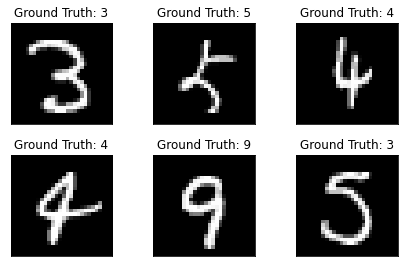

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

In [6]:
def divide_data_equally(number_of_clients, dataset):
    indices = [[] for i in range(number_of_clients)]
    for i in range(len(dataset)):
        indices[i % number_of_clients].append(i)
    trainsets = [torch.utils.data.Subset(data.train_dataset, idx) for idx in indices]
    return trainsets
    
sets = divide_data_equally(1, data.train_dataset)


In [7]:
def create_distributed_loaders(sets):
    dataloaders = [
        torch.utils.data.DataLoader(set, batch_size=config.BATCH_SIZE_TRAIN,shuffle=True, num_workers=2)
        for set in sets
    ]
    return dataloaders

dataloaders = create_loaders_from_datasets(sets)
print(len(dataloaders[0]))
examples = enumerate(dataloaders[0])
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

938


torch.Size([64, 1, 28, 28])

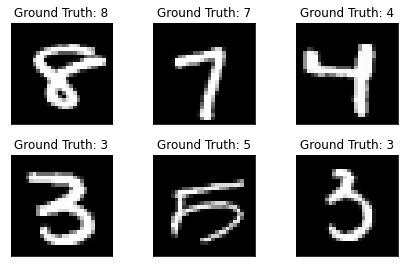

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

In [11]:
def create_clients(config, distributed_dataloaders, test_dataloader):
    return [Client(config, dataloader, test_dataloader) for dataloader in distributed_dataloaders]

clients = create_clients(config, dataloaders, data.test_dataloader)

clients[0].test()
for epoch in range(1, config.N_EPOCHS + 1):
    clients[0].train(epoch)
    clients[0].test()


Test set: Avg. loss: 2.3089, Accuracy: 1049/10000 (10%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.281244
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.307847
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.299058
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.283957
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.313629
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.299480
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.304326
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.279434
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.297791
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.290842
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.306259
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.303434
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.298171
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.304348
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.267188
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.304475
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.276731
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.257455
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.271179
Train Epoch: 1 [12160